## Assignment 4 - A43

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Dataset
X = np.array([[1, 2], [2, 3], [3, 1], [4,2], [2, 4], [3, 3]])
y= np.array([0, 0, 0, 1, 1, 1])

In [2]:
# Perceptron Learning Law
class Perceptron:
    def __init__(self, lr=0.1, epochs=100):
        self.lr = lr
        self.epochs = epochs
        
    def fit(self, x, y):
        #Initialize Weights and Bias
        self.weights = np.zeros(X.shape[1]) # Starting from 0 is okay for perceptrons since the learning rule breaks symmetry naturally.
        self.bias = 0
        for epoch in range(self.epochs):
            for xi, yi in zip(x, y):
                #Calculate Prediction
                prediction = self.predict(xi)
                #Update Weights and Bias 
                # PLL - It's a rule for updating the weights: w = w + η * (target - prediction) * x and b = b + η * (target - prediction) where η is the learning rate.
                delta = self.lr * (yi - prediction)
                self.weights += delta * xi
                self.bias += delta
                
    def predict(self, X):
        #Calculate Activation
        activation = np.dot(X, self.weights) + self.bias # computes the net input for all samples at once using vectorization.
        #Apply Step Function
        return np.where(activation >= 0, 1, 0)

In [3]:
#Train Perceptron
perceptron = Perceptron(lr=0.1, epochs=100)
perceptron.fit(X, y)

In [4]:
# Decision Regions - Line defined by weights and bias: w1x1 + w2x2 + b = 0
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
# Why is a meshgrid used?   	To generate a grid of all 2D input points to visualize how the perceptron classifies regions.
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

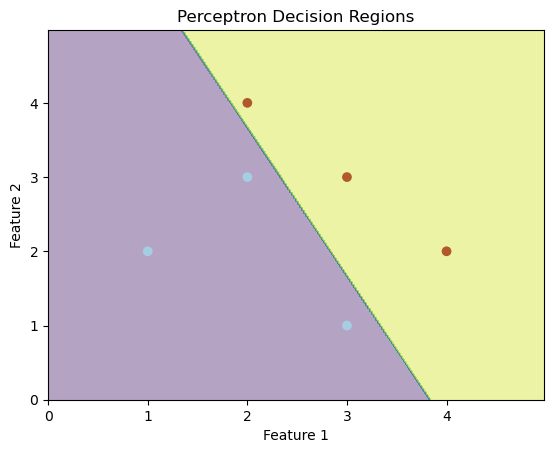

In [5]:
# Plot Results
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Perceptron Decision Regions')
plt.show()

In [ ]:
What does the decision boundary mean in the graph?  	It is the line (or surface) that separates one class from another based on learned weights. The perceptron learns this boundary by adjusting weights.

In [ ]:
# Try lr = 1.0 or 0.01 and check how fast or slow it converges.
perceptron = Perceptron(lr=1.0, epochs=100)

In [ ]:
# Add New Data Point and Retrain
X = np.vstack((X, [5, 5]))
y = np.append(y, 1)  # New point labeled as class 1
perceptron.fit(X, y)

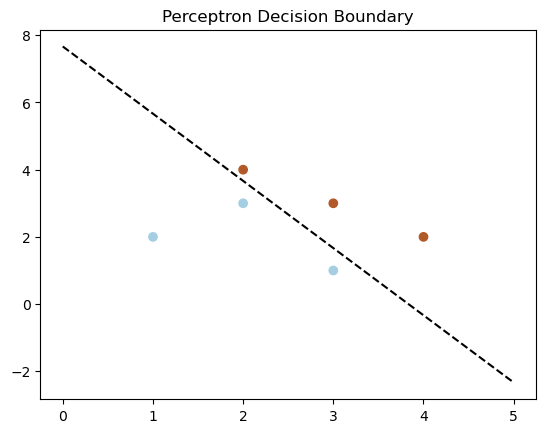

In [6]:
#Plot Decision Boundary Without Meshgrid (simplified)
# Plot the actual decision line: w1*x + w2*y + b = 0 ⟹ y = -(w1*x + b)/w2
x_vals = np.linspace(x_min, x_max, 100)
y_vals = -(perceptron.weights[0]*x_vals + perceptron.bias)/perceptron.weights[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.plot(x_vals, y_vals, 'k--')  # decision line
plt.title("Perceptron Decision Boundary")
plt.show()

In [8]:
# Display Misclassified Points
for i, xi in enumerate(X):
    pred = perceptron.predict(xi)
    if pred != y[i]:
        print(f"Misclassified point: {xi}, True: {y[i]}, Predicted: {pred}")

In [9]:
# Manual accuracy calculation
correct_predictions = 0

for xi, yi in zip(X, y):
    pred = perceptron.predict(xi)
    if pred == yi:
        correct_predictions += 1

accuracy = (correct_predictions / len(y)) * 100
print(f"Manual Accuracy: {accuracy:.2f}%")

Manual Accuracy: 100.00%
